Load Libraries

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


Matplotlib is building the font cache; this may take a moment.


Import Dataset

In [2]:
def load_images_and_labels(base_path, class_label, size=(224, 224)):
    images = []
    labels = []
    path = os.path.join(base_path, class_label)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.resize(image, size)
        images.append(image)
        labels.append(1 if class_label == 'Ship' else 0)
    return np.array(images), np.array(labels)

In [4]:
X_Ship, y_Ship = load_images_and_labels('D:/ACADEMIC/SEMESTER TWO/DESERTATION/Ship_Detection_Model/Ship_Classification/DATASET/train', 'Ship')
X_NoShip, y_NoShip = load_images_and_labels('D:/ACADEMIC/SEMESTER TWO/DESERTATION/Ship_Detection_Model/Ship_Classification/DATASET/train', 'No Ship')

X = np.concatenate((X_Ship, X_NoShip), axis=0)
y = np.concatenate((y_Ship, y_NoShip), axis=0)

Preprocess Dataset

In [4]:
X = X.astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
X_train.shape

(1889, 224, 224, 3)

Visualize Data

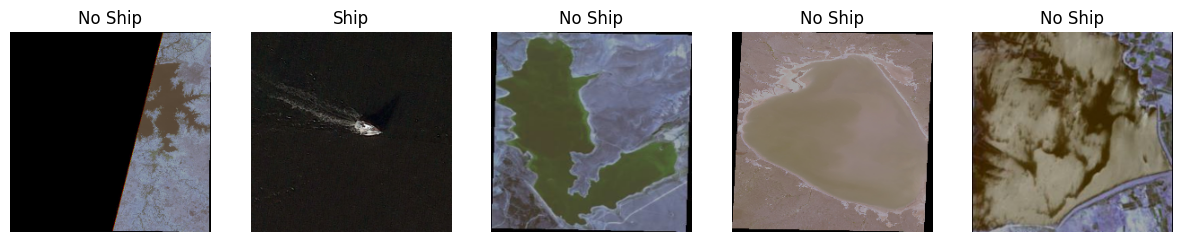

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i])
    ax.set_title('Ship' if y_train[i] == 1 else 'No Ship')
    ax.axis('off')
plt.show()

Train the Model

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(1, activation='sigmoid')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('Models/fastRCNN_Model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [10]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.25, callbacks=[checkpoint])

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 609s 13s/step - accuracy: 0.6840 - loss: 4.2275 - val_accuracy: 0.8288 - val_loss: 0.4605
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 617s 14s/step - accuracy: 0.8094 - loss: 0.4775 - val_accuracy: 0.8288 - val_loss: 0.4191
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 672s 15s/step - accuracy: 0.8068 - loss: 0.4774 - val_accuracy: 0.8288 - val_loss: 0.4224
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 685s 15s/step - accuracy: 0.8027 - loss: 0.4831 - val_accuracy: 0.8224 - val_loss: 0.4819
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 692s 15s/step - accuracy: 0.8292 - loss: 0.3259 - val_accuracy: 0.9154 - val_loss: 0.1640


Test Accuracy

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.9157 - loss: 0.1779
Test Accuracy: 90.95%


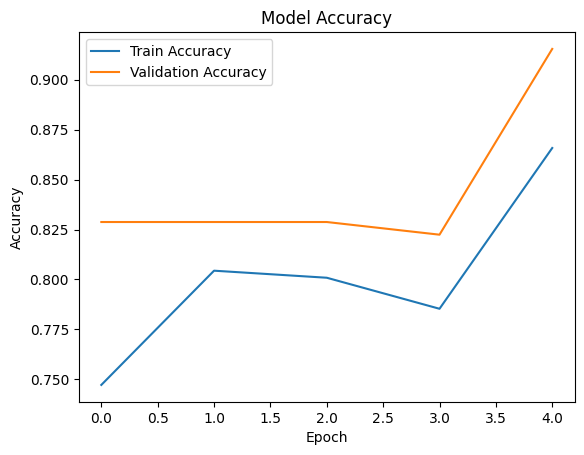

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()